In [1]:
import numpy as np
# Defining an interface which we can call later to work with Perceptron

class Perceptron:
    def __init__(self,eta = 0.01,n_iter = 1000,random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
# This fit method is used to train the perceptronon the train dataset
    def fit(self,X,y):
        # Defining an object for random number generation
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0,scale = 0.01, size = X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

X = np.array([[1, 2], [3, 4], [5, 6]])  # 3 examples, 2 features or 2 dimensional each
y = np.array([0, 1, 1])                  # Labels for each example

# Create and train the perceptron
p = Perceptron(eta=0.1, n_iter=150, random_state=1)
p.fit(X, y)

# Make a prediction
print(p.predict(X))  # Predict for a new point


[0 1 1]


In [9]:

# Loading the dataset here
import pandas as pd

s = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# print("URL is",s)
csv_reader = pd.read_csv(s,header = None , encoding = 'utf-8')
csv_reader.tail()


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


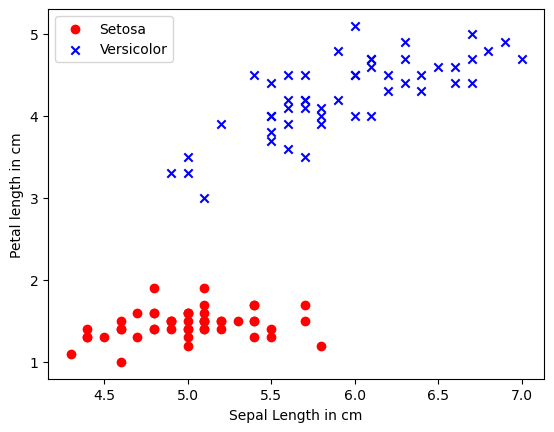

In [31]:
# Importing matplotlib for plotting the data to create a visualization
import matplotlib.pyplot as plt 
# Importing numpy for handling the loaded data 
import numpy as np
# iloc is a panda method to select data by row and column. 
# Here from row 0 to 100 is selected and column 4 is selected which is FLower_name and then converted to an array for future easier manipulation
y = csv_reader.iloc[0:100,4].values
# Using where method in numpy to assign a 0 value to Iris-setosa and 1 otherwise
y = np.where(y == 'Iris-setosa',0,1);

# Defining the feature variable X for perceptron
# We will use only 2 feature from the extracted dataset.
X = csv_reader.iloc[0:100,[0,2]].values
# Now plotting the data at first using plt



# X[:50, 0]: Takes the first 50 rows (Setosa) and column 0 (sepal length) as the x-coordinates.
# X[:50, 1]: Takes the first 50 rows and column 1 (petal length) as the y-coordinates.
# color='red': Makes the dots red.
# marker='o': Uses circles as the dot shape (o for circle; could be s for square, etc.).
# label='Setosa': Labels these points as "Setosa" for the legend.
plt.scatter(X[0:50, 0], X[0:50, 1],color='red', marker='o', label='Setosa')
# Similar plotting mechanism for Versicolor
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='Versicolor')

# Labelling x axis and y-axis for better understanding
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal length in cm')
plt.legend(loc='upper left')
plt.show()
           



Iris-Setosa


Text(0, 0.5, 'Number of Updates')

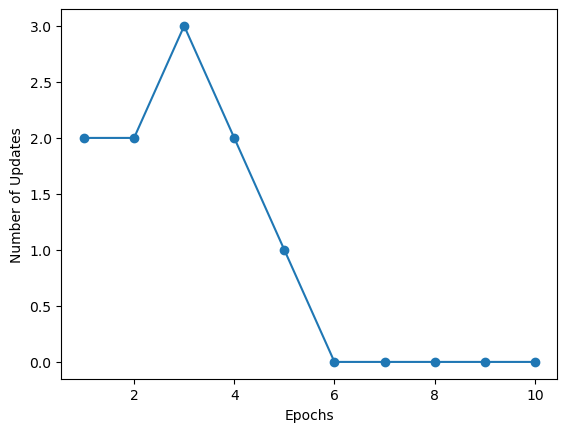

In [63]:
# Time to train our perception algorithm for training
Perc_Inst = Perceptron(eta = 0.1, n_iter = 10)
Perc_Inst.fit(X,y);
test_data = csv_reader.iloc[0:1,[0,2]]
# print(test_data)
if(Perc_Inst.predict(test_data) == 0):
    print('Iris-Setosa')
else:
    print('Iris-versicolor')
plt.plot(range(1, len(Perc_Inst.errors_) + 1),Perc_Inst.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Updates')
